<a href="https://colab.research.google.com/github/ushabolimera/Demand-for-Shared-Bikes-Prediction/blob/main/Demand_for_Shared_Bikes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KAATRU - IIT MADRAS Assignment

#Goal:
Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.


In [ ]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Assignments/Kaatru - IIT Madras/day.xlsx")

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726.0,27-12-2019,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,727.0,28-12-2019,1.0,1.0,12.0,0.0,6.0,0.0,2.0,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,728.0,29-12-2019,1.0,1.0,12.0,0.0,0.0,0.0,2.0,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,729.0,30-12-2019,1.0,1.0,12.0,0.0,1.0,1.0,1.0,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0
729,730.0,31-12-2019,1.0,1.0,12.0,0.0,2.0,1.0,2.0,8.849153,11.17435,57.7500,10.374682,439.0,2290.0,2729.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    float64
 1   dteday      730 non-null    object 
 2   season      730 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     730 non-null    float64
 6   weekday     730 non-null    float64
 7   workingday  730 non-null    float64
 8   weathersit  730 non-null    float64
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    float64
 14  registered  730 non-null    float64
 15  cnt         730 non-null    float64
dtypes: float64(15), object(1)
memory usage: 91.4+ KB


In [ ]:
df["dteday"]=pd.to_datetime(df["dteday"])

In [ ]:
# Extracting day,month,year from dteday column

df['Year']=pd.DatetimeIndex(df['dteday']).year
df['Month']=pd.DatetimeIndex(df['dteday']).month
df['Day']=pd.DatetimeIndex(df['dteday']).day
df.drop(columns=['dteday'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    float64
 1   season      730 non-null    float64
 2   yr          730 non-null    float64
 3   mnth        730 non-null    float64
 4   holiday     730 non-null    float64
 5   weekday     730 non-null    float64
 6   workingday  730 non-null    float64
 7   weathersit  730 non-null    float64
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    float64
 13  registered  730 non-null    float64
 14  cnt         730 non-null    float64
 15  Year        730 non-null    int64  
 16  Month       730 non-null    int64  
 17  Day         730 non-null    int64  
dtypes: float64(15), int64(3)
memory usage: 102.8 KB


#EDA

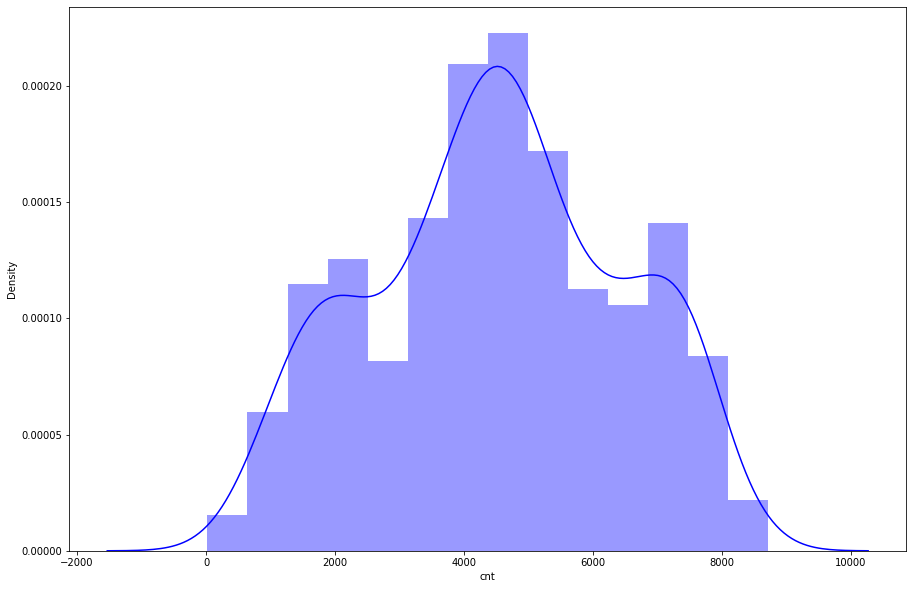

In [ ]:
#Distribution of cnt
plt.figure(figsize=(15,10))
sns.distplot((df['cnt']),color="b")

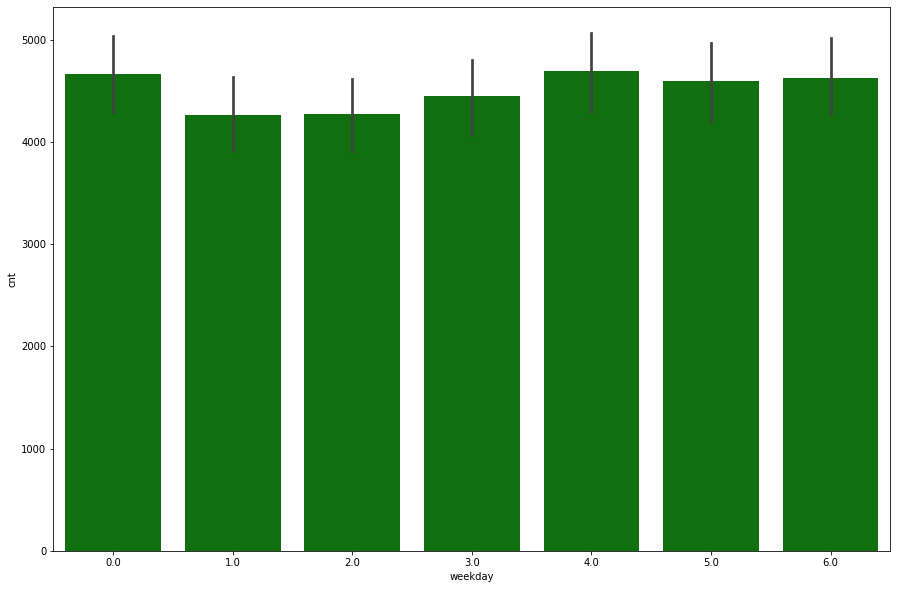

In [ ]:
#Plot b/w weekday Vs cnt
plt.figure(figsize=(15,10))
sns.barplot(x=df['weekday'],y=df['cnt'],color="g")

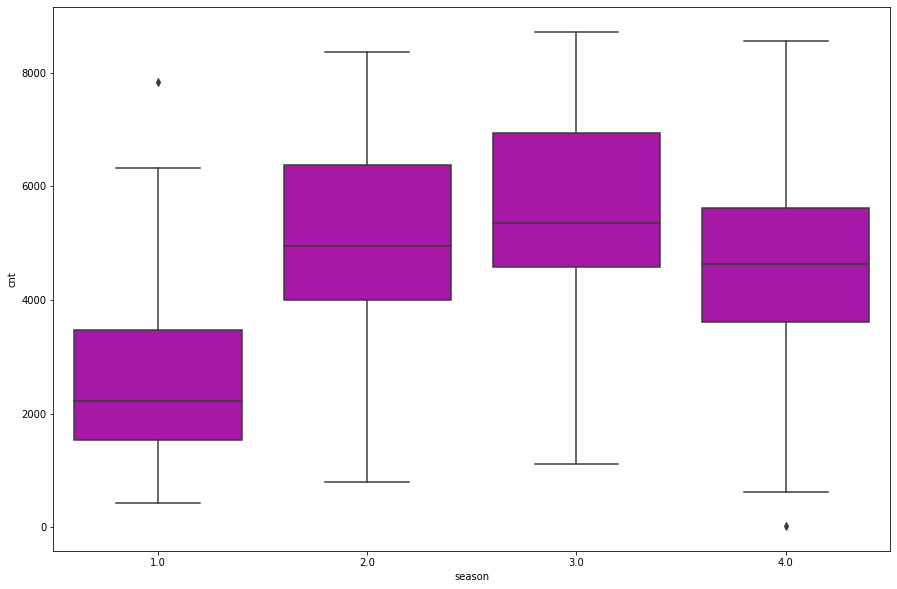

In [ ]:
#Plot b/w season Vs cnt
plt.figure(figsize=(15,10))
sns.boxplot(x=df['season'],y=df['cnt'],color="m")

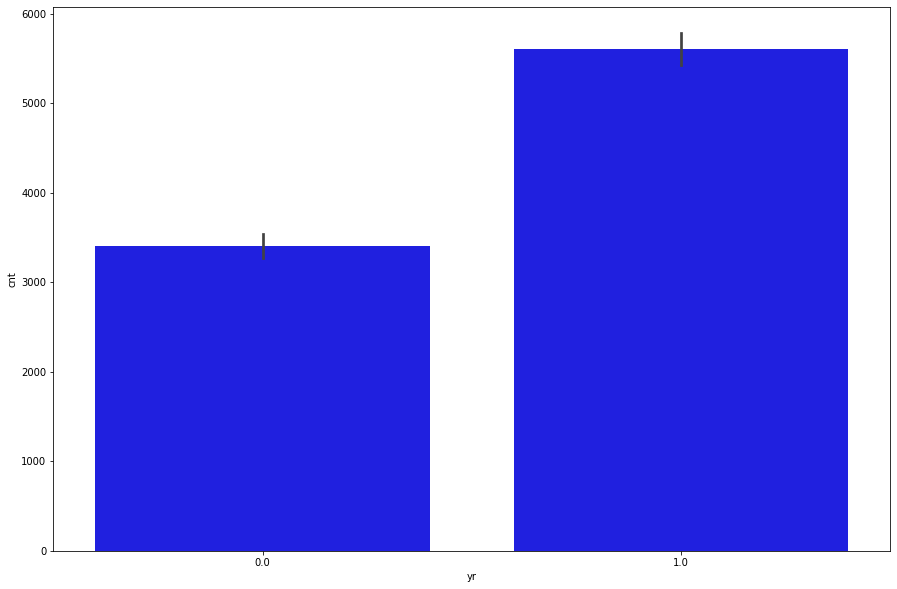

In [ ]:
#Plot b/w yr Vs cnt
plt.figure(figsize=(15,10))
sns.barplot(x=df['yr'],y=df['cnt'],color="b")

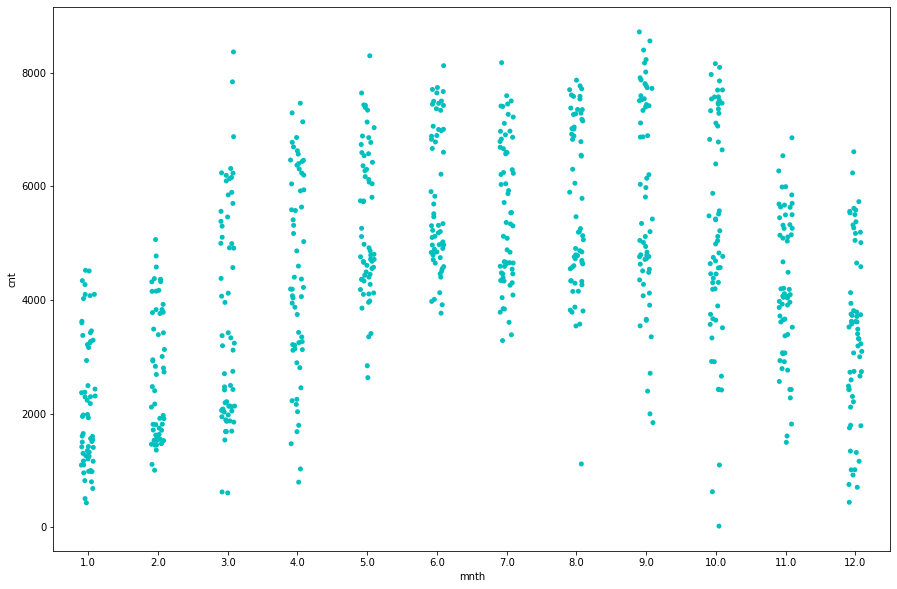

In [ ]:
#Plot b/w mnth Vs cnt
plt.figure(figsize=(15,10))
sns.stripplot(x=df['mnth'],y=df['cnt'],color="c")

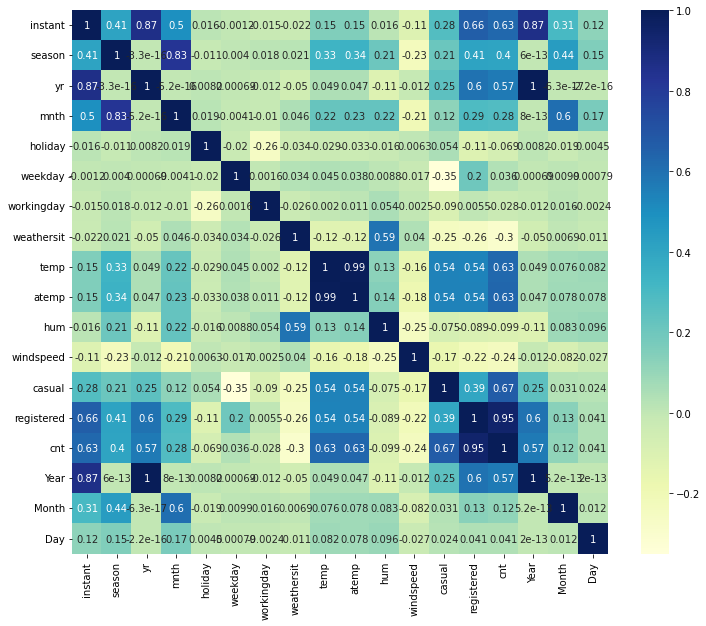

In [ ]:
#checking correlation using heatmap
plt.rcParams['figure.figsize']=(12,10)
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

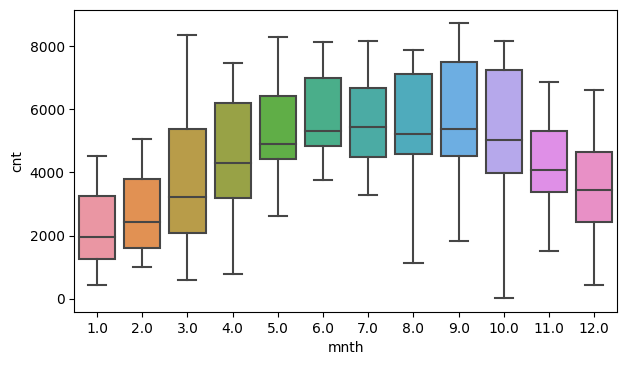

In [ ]:
# Box plot for mnth Vs cnt
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.show()

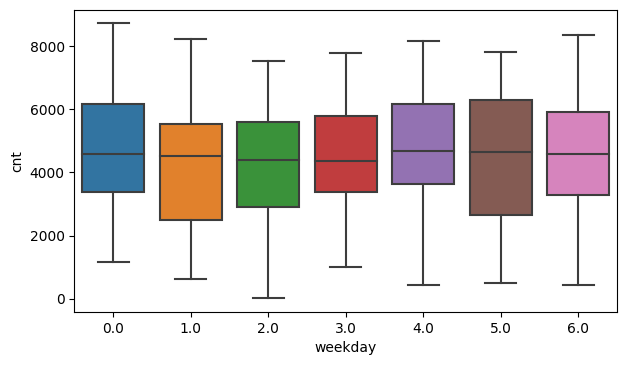

In [ ]:
# Box plot for weekday Vs cnt
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.show()

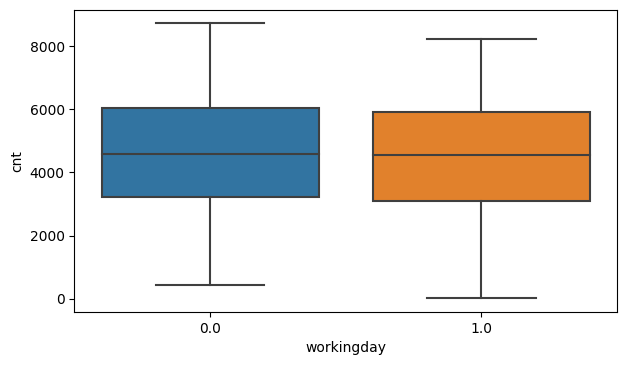

In [ ]:
# Box plot for workingday Vs cnt Bike Count
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.show()

#Conclusion

* From the Exploratory Data Analysis we can observe that demand for the shared bikes is high in summer and very low in winter.
*   The demand for the shared bikes is high in 2019 compared to 2018.
*   We can observe the positive correlation between registered,casual,instant with cnt.

*   The demand is high in september month and low in january.
*   The demand for the shared bikes is high in saturday and low in tuesday. 






#Modeling

**Creating Function to train linear models and calculate scores**

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values 
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

**creating function to run different models**

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)


    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

**creating function to get feature importance**

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

**Train | Test Split for Linear Regression**

In [ ]:
dependent_variable = 'cnt'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = np.sqrt(df[dependent_variable].values)

In [ ]:
X.shape

(730, 17)

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
#scaling data
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#Linear Regression

In [ ]:
#linear regression model

linear_model= LinearRegression()

MSE : 67949.91783400025
RMSE : 260.67205035062784
R2 : 0.9835224520963562
Adjusted R2 :  0.9813340277654036


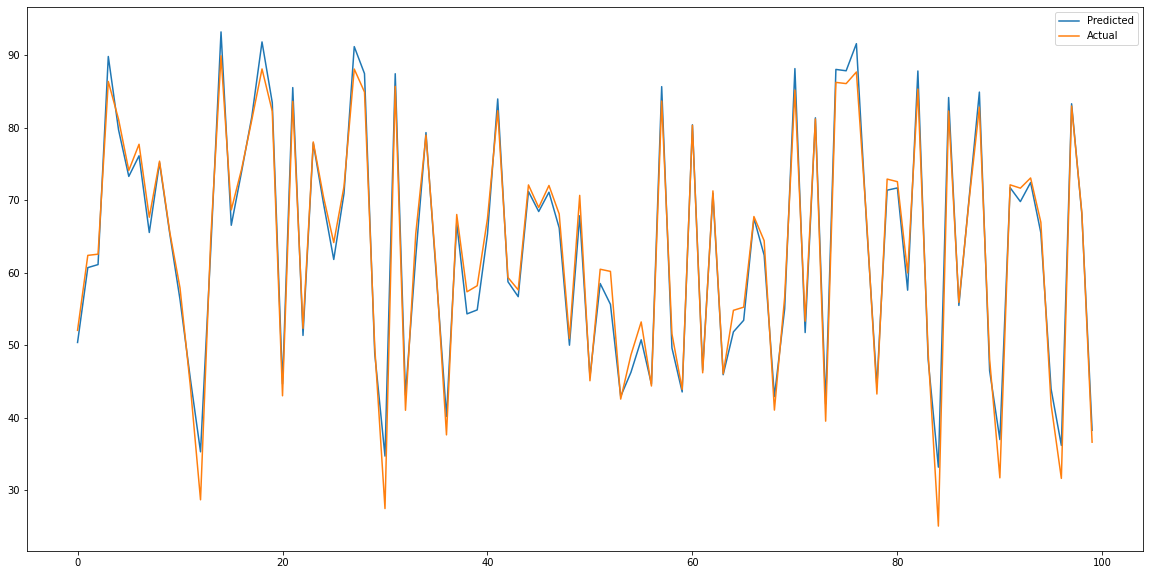

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#Regularisation

In [ ]:
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

MSE : 69255.19169621335
RMSE : 263.1638115247105
R2 : 0.9832059290853272
Adjusted R2 :  0.9809754665419722


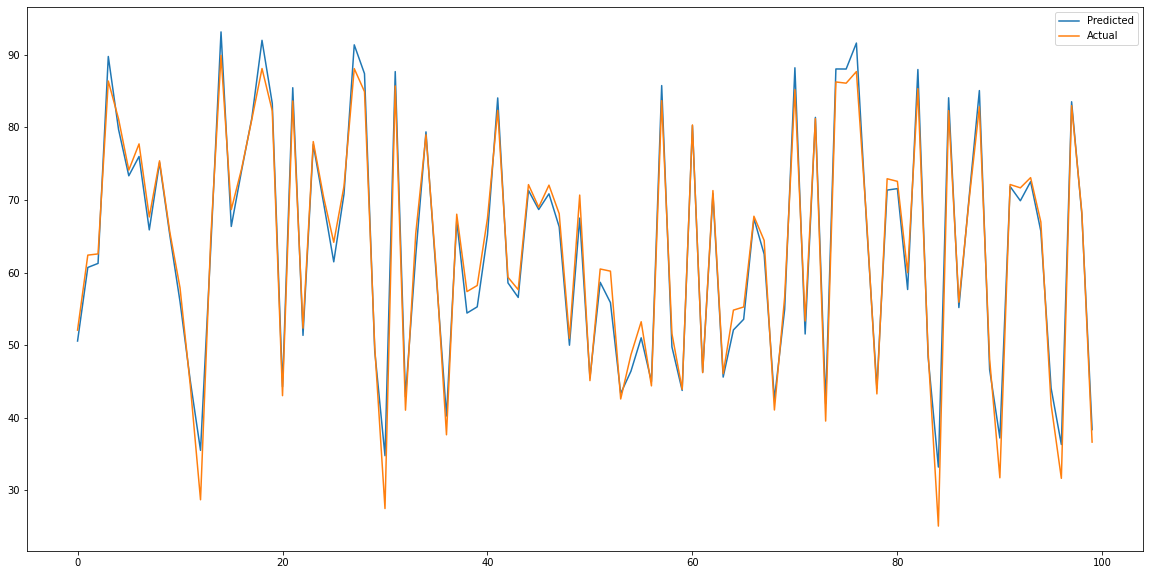

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

#Ridge Regression

In [ ]:
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

MSE : 67949.92310875055
RMSE : 260.67206046822616
R2 : 0.9835224508172531
Adjusted R2 :  0.9813340263164195


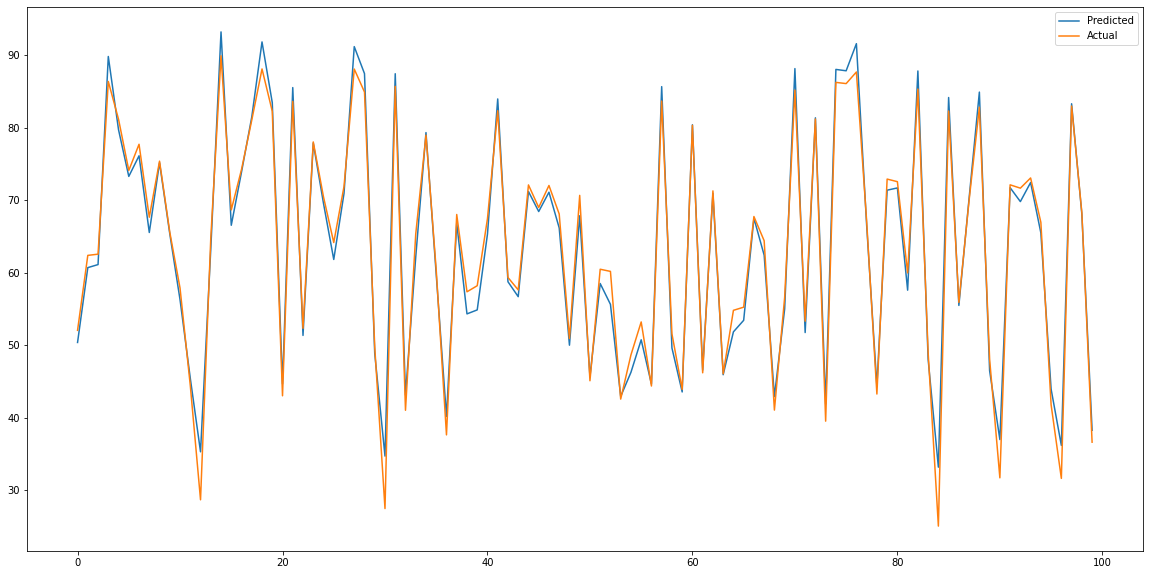

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

#ElasticNet Regression

In [ ]:
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

MSE : 69295.24098311162
RMSE : 263.23989246144214
R2 : 0.9831962173142992
Adjusted R2 :  0.9809644649263546


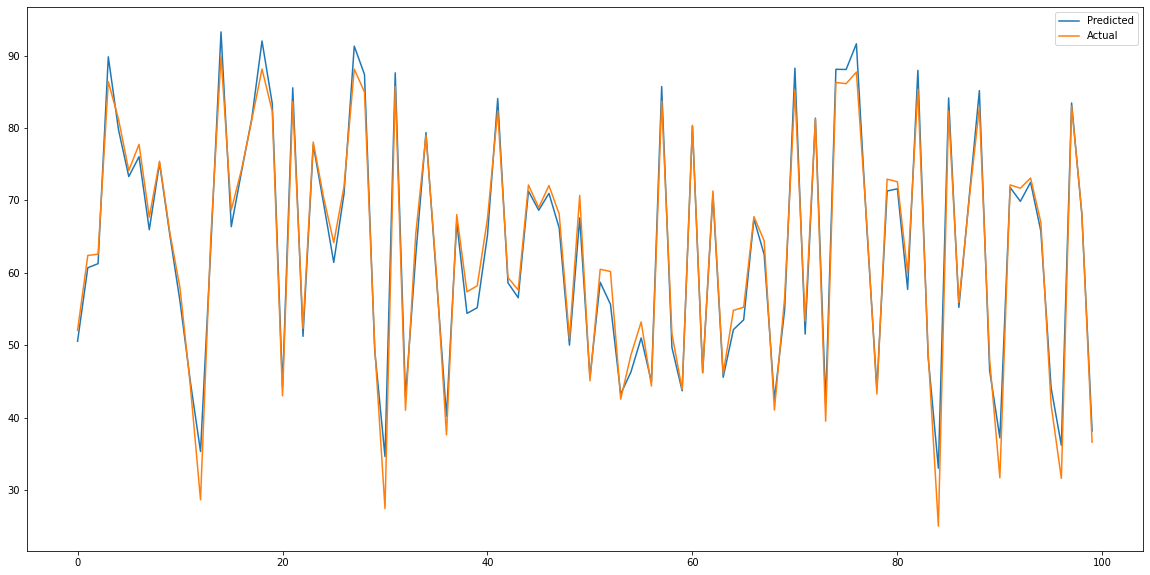

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

#Decision Tree Regression

In [ ]:
#creating X for independent variable
X=df.drop(['cnt'],axis=1)

In [ ]:
#creating y for dependent variable
y=df['cnt']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

MSE : 41935.96575342466
RMSE : 204.78272816188542
R2 : 0.9905277761370971
Adjusted R2 :  0.9892697464053053


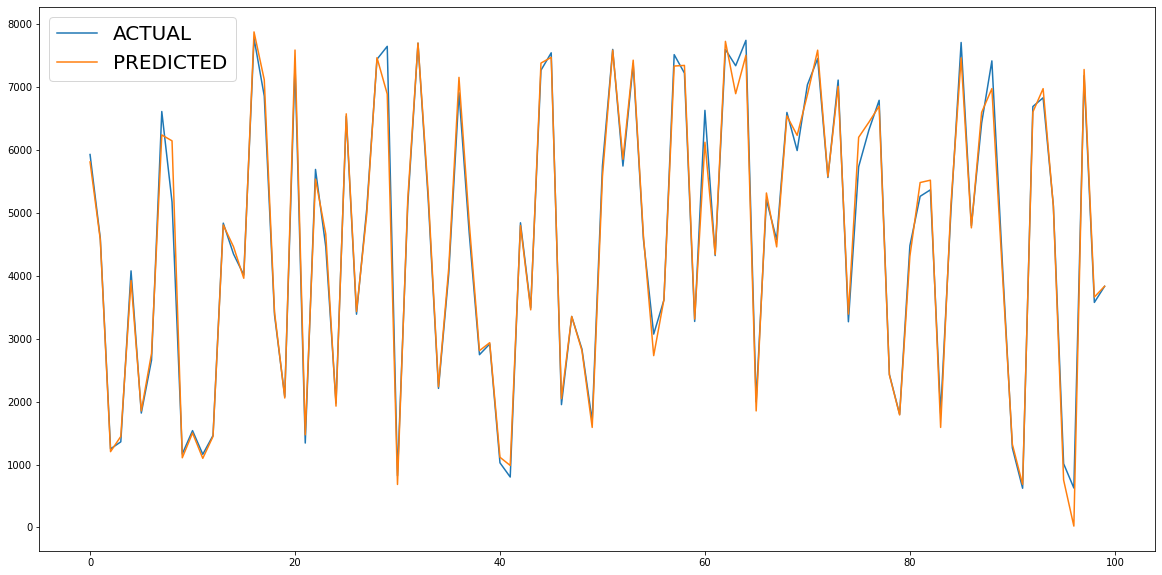

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

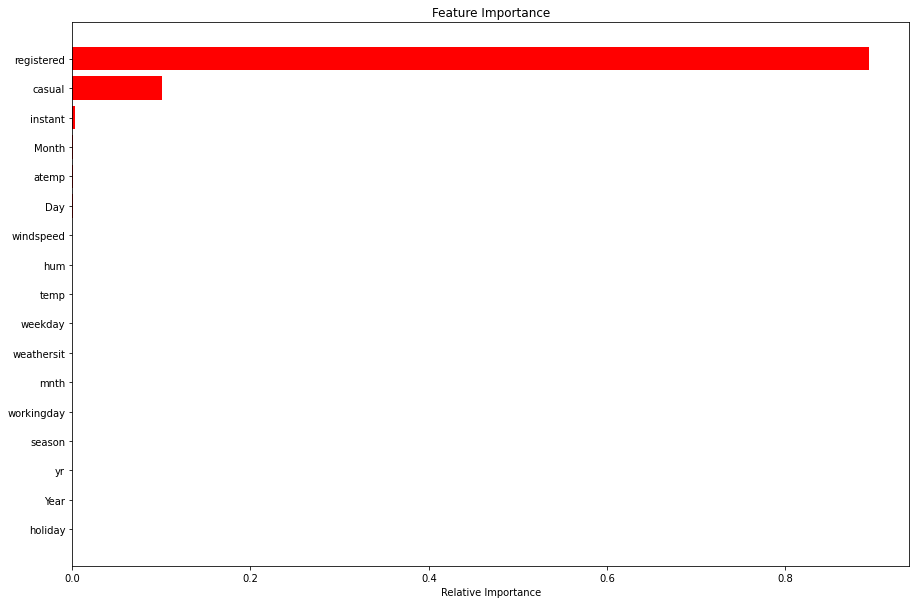

In [ ]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

#Random Forest

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

MSE : 12808.987556140992
RMSE : 113.17679778179355
R2 : 0.9971067889958157
Adjusted R2 :  0.9967225344093225


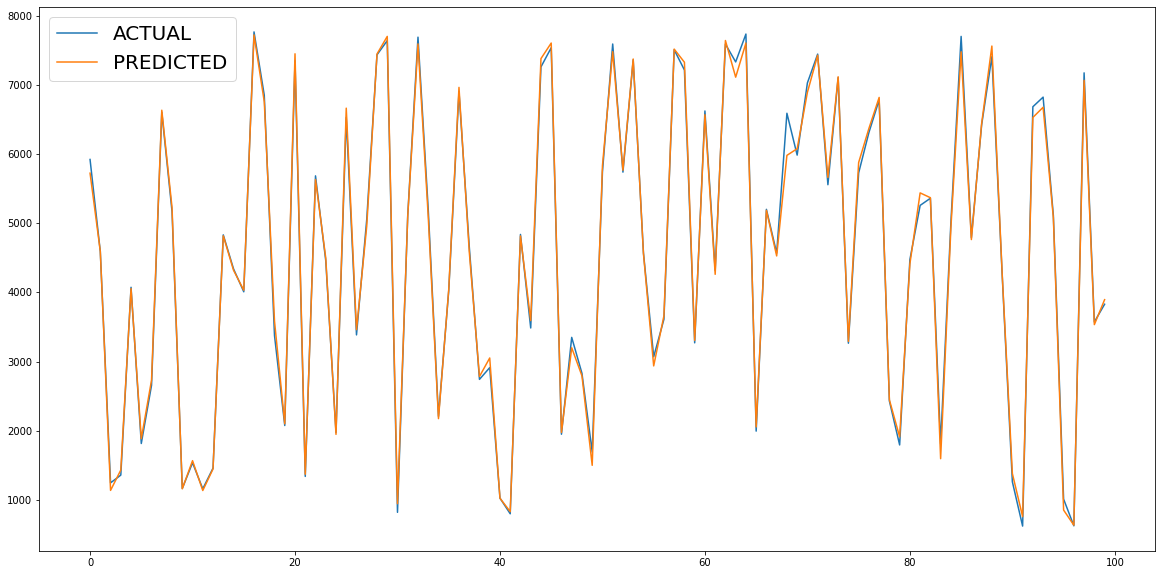

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

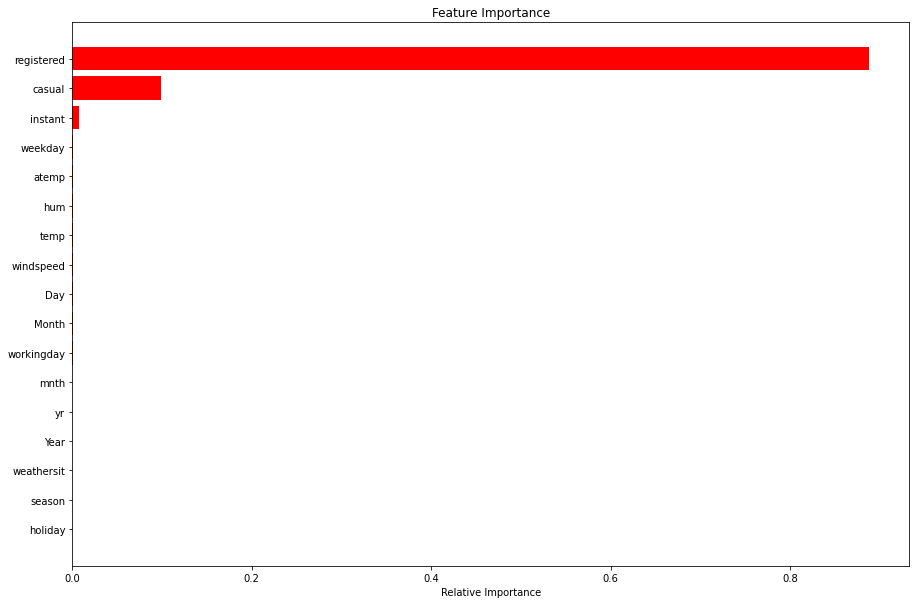

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

#Gradient Boosting

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

MSE : 35157.926514876315
RMSE : 187.50447065303888
R2 : 0.9920587556642307
Adjusted R2 :  0.9910040591508864


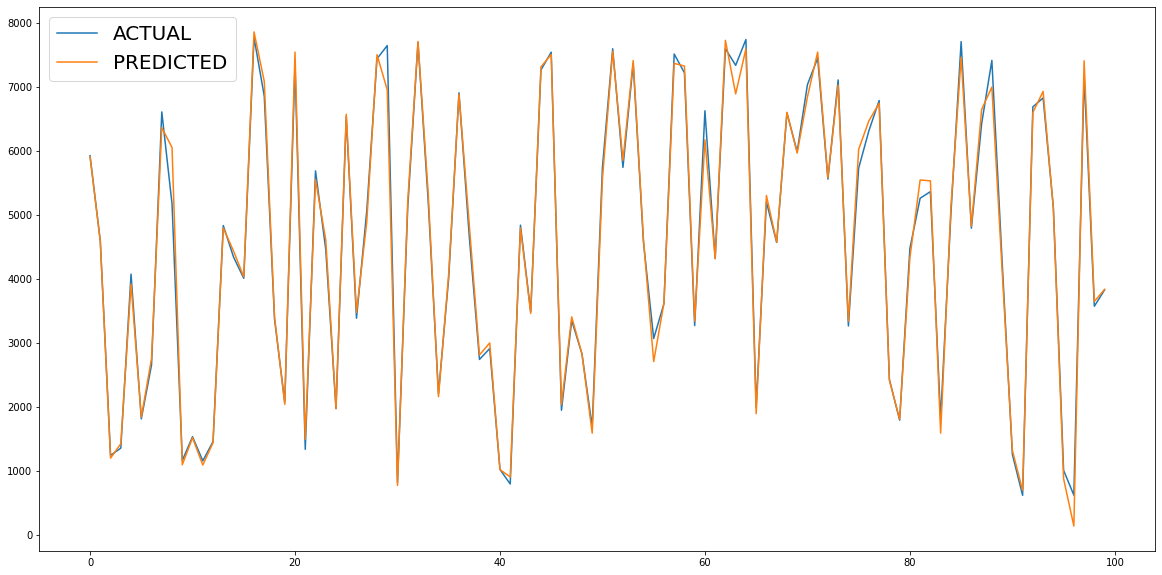

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

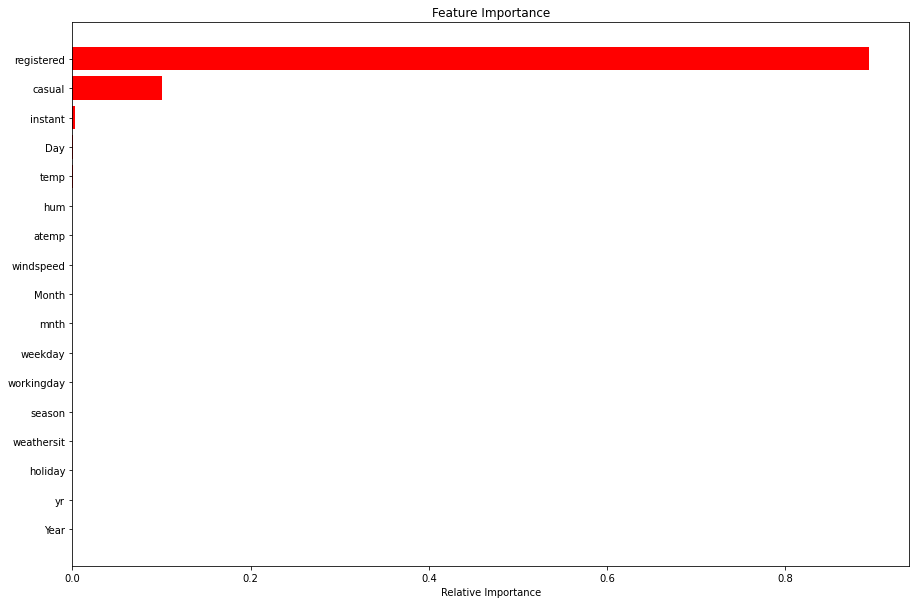

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

#Final Conclusion:

* Random Forest and Gradient Boosting Models shows Good Adjusted R2 score of 99.67% and 99.10% respectively.
* The Important Features from the Random Forest are Registered, Casual, Instant.
* The variables that are significant in predicting the demand for shared bikes are Registered, Casual, Instant.